# **RANDOM FOREST + CLUSTERING GRAPHICAL ANALYSIS**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics

## Data load

In [ ]:
df = pd.read_csv('test.csv')


# Model

In [ ]:
#data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (124, 8) and size 992
X_test shape (32, 8) and size 256
y_train shape (124,) and size 124
y_test shape (32,) and size 32


##  Random Forest + CLUSTERING

In [ ]:
# One Hot Encoding
feature = pd.get_dummies(X)
# List of features 
feature_list = list(feature.columns)
features_num = np.size(feature_list)
# Convert to numpy arrays
features = np.array(feature)
print("features numbers: ", features_num)

features numbers:  8


In [ ]:
# model apply

ntree_list = [10, 20, 50, 100, 200, 500, 1000]
mtry_list = [int(0.5*features_num**0.5),
             int(features_num**0.5), int(2*features_num**0.5)]
best_ntree = 0
best_mtry = 0
best_error = 9999999999999
best_model = None
best_y_pred = 0
count = 0
total_models = len(ntree_list) * len(mtry_list)
for ntree in ntree_list:
    for mtry in mtry_list:
        count += 1
        print("Training model %i out of %i..." % (count, total_models))
        print("ntree: %i, mtry: %i" % (ntree, mtry))
        rfg = RandomForestRegressor(n_estimators=ntree,
                                    max_features=mtry,
                                    bootstrap=True,
                                    random_state=0)
        rfg.fit(X_train, y_train)
        # predict the test dataset
        y_pred = rfg.predict(X_test)
        # compute square root error
        error = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
        if error < best_error:
            best_ntree = ntree
            best_mtry = mtry
            best_error = error
            best_model = rfg
            print("Found new optimal model")
            print(best_model)
            print("The error of model RFR : %6f" % best_error)
            print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))
            print(
                "========================================================================")
# print optimal results
print("========================================================================")
print('Finished tuning model')
print('Optimal model')
print(best_model)
print("The error of model RFR : %6f" % best_error)
print("best_ntree: %i, best_mtry: %i" % (best_ntree, best_mtry))

Training model 1 out of 21...
ntree: 10, mtry: 1
Found new optimal model
RandomForestRegressor(max_features=1, n_estimators=10, random_state=0)
The error of model RFR : 20.129860
best_ntree: 10, best_mtry: 1
Training model 2 out of 21...
ntree: 10, mtry: 2
Training model 3 out of 21...
ntree: 10, mtry: 5
Training model 4 out of 21...
ntree: 20, mtry: 1
Training model 5 out of 21...
ntree: 20, mtry: 2
Training model 6 out of 21...
ntree: 20, mtry: 5
Found new optimal model
RandomForestRegressor(max_features=5, n_estimators=20, random_state=0)
The error of model RFR : 18.807501
best_ntree: 20, best_mtry: 5
Training model 7 out of 21...
ntree: 50, mtry: 1
Training model 8 out of 21...
ntree: 50, mtry: 2
Training model 9 out of 21...
ntree: 50, mtry: 5
Found new optimal model
RandomForestRegressor(max_features=5, n_estimators=50, random_state=0)
The error of model RFR : 17.917389
best_ntree: 50, best_mtry: 5
Training model 10 out of 21...
ntree: 100, mtry: 1
Training model 11 out of 21...


# CLUSTERING RESULTS ANALYSIS based on university students data 

## Predication VS Actual

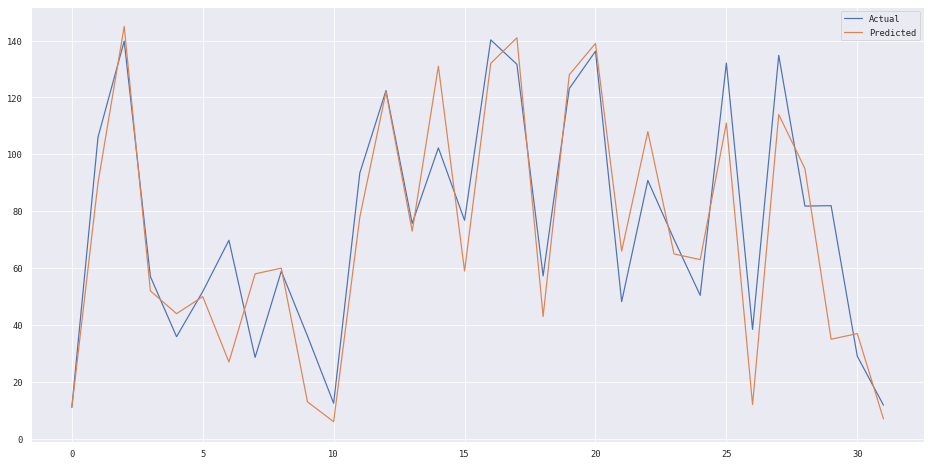

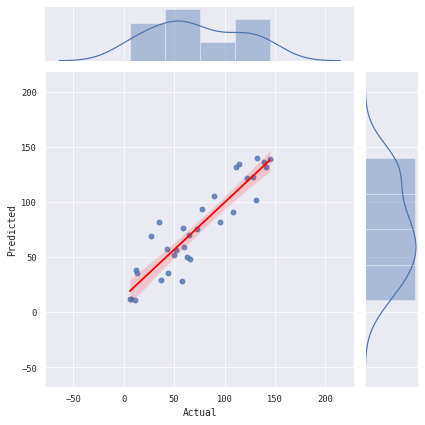

In [ ]:
# predict the test dataset
y_pred = best_model.predict(X_test)
test = pd.DataFrame({'Predicted':y_pred, 
                     'Actual':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual','Predicted'])
sns.jointplot(x='Actual',y='Predicted',data=test,kind="reg", joint_kws={'line_kws':{'color':'red'}})